<a href="https://colab.research.google.com/github/RosemaryYool/Notes-for-AI-in-Science-and-Medicine/blob/main/Hahn_AI_2023_Autoencoder_and_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

### Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
from imageio import *
import torch
from skimage.transform import resize
from mpl_toolkits.axes_grid1.axes_rgb import make_rgb_axes, RGBAxes
from torchvision.models import *
from torchvision.datasets import MNIST,KMNIST,FashionMNIST
from skimage.util import montage

In [ ]:
!pip install wandb
import wandb as wb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.8 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=0dc9f25ccfa629a37d342fc60e557f4fdbbab5358bb95fe5c25b5794f884a785
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()

In [ ]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [ ]:
b = 1000

def get_batch(mode):
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y


## MNIST
    

### Load Data

In [ ]:
# #MNIST
# train_set = MNIST('./data', train=True, download=True)
# test_set  = MNIST('./data', train=False, download=True)

#KMNIST
train_set = KMNIST('./data', train=True, download=True)
test_set =  KMNIST('./data', train=False, download=True)

# Fashion MNIST
# train_set = FashionMNIST('./data', train=True, download=True)
# test_set =  FashionMNIST('./data', train=False, download=True)

100%|██████████| 18165135/18165135 [00:13<00:00, 1319515.27it/s]


Extracting ./data/KMNIST/raw/train-images-idx3-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 29497/29497 [00:00<00:00, 205954.58it/s]


Extracting ./data/KMNIST/raw/train-labels-idx1-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 3041136/3041136 [00:02<00:00, 1049356.77it/s]


Extracting ./data/KMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 5120/5120 [00:00<00:00, 5530475.53it/s]

Extracting ./data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/KMNIST/raw



In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [ ]:
X.shape

(60000, 1, 28, 28)

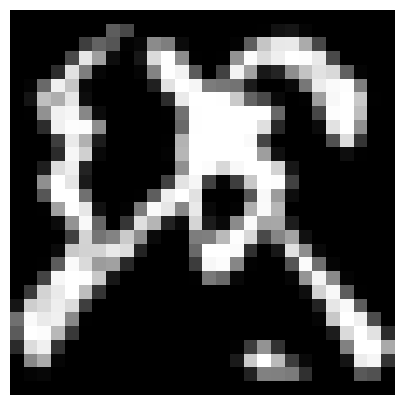

In [ ]:
plot(X[101,0,:,:])

In [ ]:
Y[100]

0

In [ ]:
X[0:25,0,:,:].shape

(25, 28, 28)

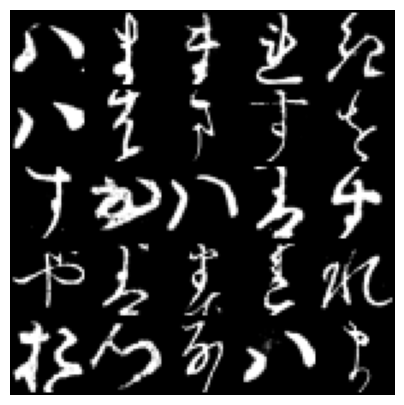

In [ ]:
montage_plot(X[125:150,0,:,:])

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape

(10000, 1, 28, 28)

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape[0]

10000

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [ ]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)


### Classifier


In [ ]:
x,y = get_batch('train')

In [ ]:
x.shape

torch.Size([1000, 784])

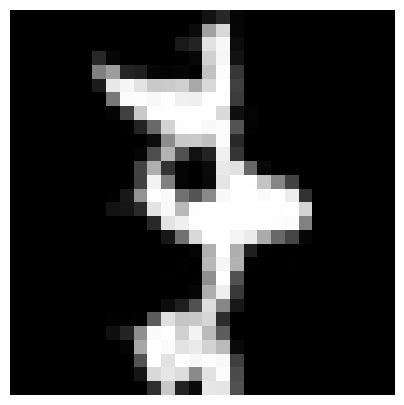

In [ ]:
plot(x[0].reshape(28,28))

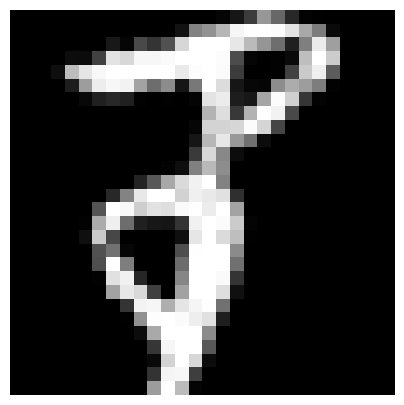

In [ ]:
plot(x[1].reshape(28,28))

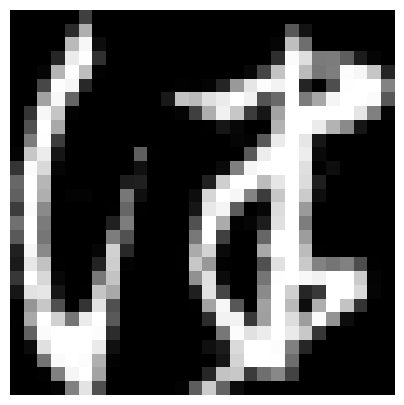

In [ ]:
plot(x[2].reshape(28,28))

In [ ]:
y[:10]

tensor([6., 6., 3., 4., 1., 1., 7., 6., 1., 9.], device='cuda:0')

In [ ]:
W = GPU(np.random.randn(784,10))

In [ ]:
x.shape, W.shape

(torch.Size([1000, 784]), torch.Size([784, 10]))

In [ ]:
torch.matmul(x,W).shape

torch.Size([1000, 10])

In [ ]:
(x@W).shape

torch.Size([1000, 10])

In [ ]:
%%timeit
x@W

In [ ]:
x@W

tensor([[ -3.3121,   9.2079,  -5.5728,  ...,   1.6261,   3.1654,   3.3680],
        [-10.2442,   7.8014, -10.1599,  ...,  12.4812, -16.6629,   3.9780],
        [ 11.9223,   4.2103,  -3.2867,  ...,  17.3022,   7.4583,   7.7755],
        ...,
        [  7.4809,   2.7282, -12.0927,  ...,   0.8984,   2.6963,   1.5276],
        [  9.5540,  24.6414,  -6.8699,  ...,   8.6418,  12.4258,   9.4616],
        [  7.1387,   2.6747,  -9.4044,  ...,  -5.7362,  -4.0096,   4.0368]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
y2 = x@W 

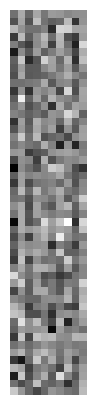

In [ ]:
plot(y2[:50])

In [ ]:
y

tensor([6., 6., 3., 4., 1., 1., 7., 6., 1., 9., 5., 8., 9., 5., 2., 8., 9., 4.,
        5., 9., 1., 1., 6., 1., 9., 0., 5., 7., 9., 8., 1., 7., 8., 2., 3., 4.,
        6., 2., 4., 0., 7., 8., 7., 6., 8., 4., 9., 4., 4., 5., 0., 9., 2., 0.,
        9., 7., 0., 4., 8., 4., 8., 4., 9., 8., 5., 4., 0., 7., 9., 1., 4., 3.,
        6., 8., 7., 5., 3., 4., 5., 9., 5., 0., 6., 5., 3., 2., 5., 3., 6., 2.,
        3., 7., 8., 9., 3., 1., 8., 6., 0., 1., 4., 6., 6., 2., 3., 0., 1., 6.,
        9., 7., 0., 1., 4., 8., 2., 0., 3., 7., 2., 0., 1., 3., 3., 0., 8., 7.,
        7., 3., 7., 0., 6., 8., 2., 3., 3., 8., 7., 3., 1., 9., 5., 2., 3., 3.,
        2., 9., 2., 8., 4., 3., 9., 6., 6., 7., 7., 0., 6., 3., 6., 3., 9., 0.,
        3., 5., 1., 7., 0., 3., 2., 8., 0., 2., 7., 2., 0., 9., 9., 7., 0., 9.,
        3., 6., 1., 5., 5., 8., 2., 5., 0., 5., 9., 8., 4., 6., 6., 1., 0., 0.,
        3., 9., 4., 9., 2., 1., 1., 6., 5., 3., 8., 4., 0., 8., 8., 6., 5., 0.,
        0., 1., 2., 7., 1., 2., 7., 5., 

In [ ]:
y.shape

torch.Size([1000])

In [ ]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [ ]:
one_hot(y)

<ipython-input-17-c3d856de2607>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

In [ ]:
torch.argmax(y2,1)

tensor([1, 3, 6, 1, 9, 9, 4, 5, 7, 4, 7, 1, 6, 7, 7, 3, 1, 4, 7, 4, 5, 6, 1, 1,
        9, 7, 1, 7, 9, 6, 1, 6, 7, 3, 0, 9, 9, 9, 9, 0, 1, 4, 1, 4, 4, 3, 7, 6,
        3, 0, 7, 7, 9, 0, 9, 0, 0, 0, 6, 9, 1, 1, 7, 7, 9, 1, 1, 6, 3, 3, 9, 8,
        3, 5, 1, 1, 7, 4, 7, 7, 9, 1, 1, 8, 9, 3, 8, 6, 3, 7, 7, 1, 7, 6, 5, 9,
        6, 8, 1, 3, 4, 1, 3, 3, 9, 9, 9, 6, 9, 1, 1, 9, 4, 1, 3, 9, 7, 0, 0, 9,
        6, 0, 5, 3, 0, 1, 1, 9, 3, 4, 6, 6, 4, 4, 0, 7, 9, 5, 1, 4, 9, 1, 7, 0,
        3, 9, 5, 3, 3, 9, 9, 6, 7, 1, 1, 4, 9, 9, 1, 5, 9, 4, 0, 5, 9, 0, 0, 0,
        3, 9, 9, 1, 1, 1, 0, 1, 9, 1, 3, 6, 9, 1, 1, 1, 0, 8, 3, 6, 8, 9, 4, 9,
        6, 9, 3, 6, 1, 0, 0, 4, 1, 9, 1, 6, 1, 1, 5, 6, 1, 6, 0, 6, 6, 3, 5, 4,
        7, 1, 1, 1, 6, 1, 3, 7, 9, 3, 3, 7, 1, 6, 1, 5, 4, 6, 6, 6, 1, 9, 4, 9,
        1, 0, 3, 1, 0, 4, 9, 9, 9, 6, 8, 6, 1, 9, 9, 4, 1, 6, 9, 9, 5, 1, 1, 4,
        5, 7, 1, 0, 4, 1, 3, 0, 1, 8, 1, 7, 0, 1, 7, 1, 5, 0, 3, 0, 9, 1, 5, 1,
        5, 3, 1, 7, 5, 9, 9, 1, 2, 0, 7,

In [ ]:
torch.sum(y == torch.argmax(y2,1))/b

tensor(0.1370, device='cuda:0')

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
X@W

tensor([[ -9.3537,  -1.2463, -13.9675,  ...,  20.6019, -22.7067,   7.4031],
        [ -3.5027,   8.5729,  -9.6719,  ..., -14.2327,   1.9850,   3.9739],
        [  8.6514,  12.5927, -11.1257,  ...,   5.7681,  -3.0703,   7.5013],
        ...,
        [ 11.1046,  12.2368, -15.9309,  ...,   6.1688,   2.5062,  23.6341],
        [ -5.2973, -13.7094, -22.9165,  ...,  -2.9944,  -3.8570,  10.2242],
        [ -7.7338,  10.2183,  -0.9798,  ...,  -4.2942, -16.0662,  12.0481]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
torch.argmax(X@W,1)

tensor([7, 4, 6,  ..., 9, 4, 9], device='cuda:0')

In [ ]:
Y

tensor([8., 7., 0.,  ..., 0., 4., 9.], device='cuda:0')

In [ ]:
torch.sum(torch.argmax(X@W,1) == Y)/60000

tensor(0.1270, device='cuda:0')

In [ ]:
X@W

tensor([[ -9.3537,  -1.2463, -13.9675,  ...,  20.6019, -22.7067,   7.4031],
        [ -3.5027,   8.5729,  -9.6719,  ..., -14.2327,   1.9850,   3.9739],
        [  8.6514,  12.5927, -11.1257,  ...,   5.7681,  -3.0703,   7.5013],
        ...,
        [ 11.1046,  12.2368, -15.9309,  ...,   6.1688,   2.5062,  23.6341],
        [ -5.2973, -13.7094, -22.9165,  ...,  -2.9944,  -3.8570,  10.2242],
        [ -7.7338,  10.2183,  -0.9798,  ...,  -4.2942, -16.0662,  12.0481]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
W[:,0].shape

torch.Size([784])

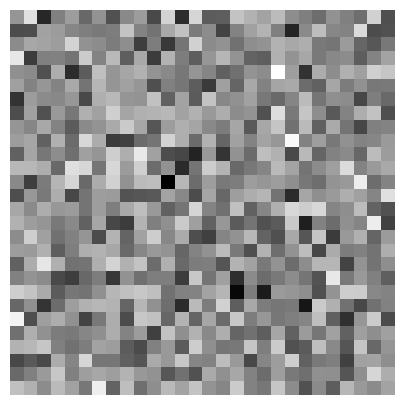

In [ ]:
plot(W[:,0].reshape(28,28))

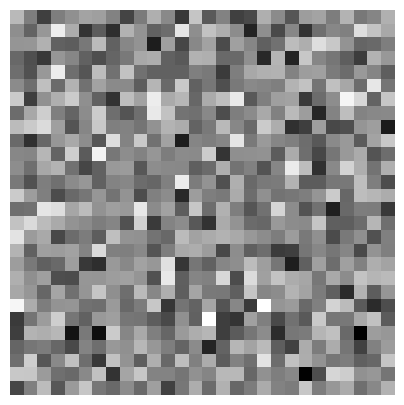

In [ ]:
plot(W[:,2].reshape(28,28))

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
(W.T).shape

torch.Size([10, 784])

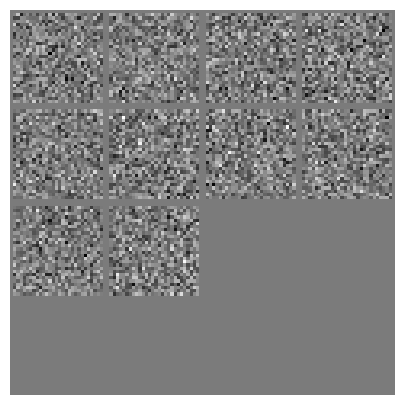

In [ ]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
def acc(out,y):
    return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def gradient_step(w):

    w[0].data = w[0].data - c.L*w[0].grad.data
    
    w[0].grad.data.zero_()

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


<ipython-input-17-c3d856de2607>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


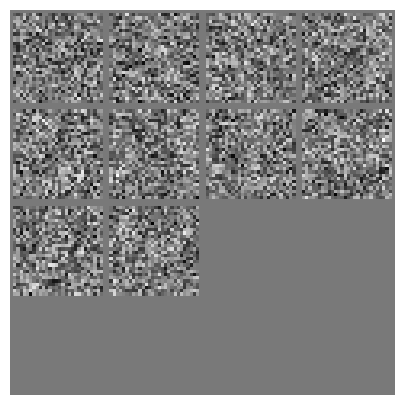

wandb: ERROR Control-C detected -- Run data was not synced


Problem at: <ipython-input-65-ed27ff054064> 3 <cell line: 1>


KeyboardInterrupt: ignored

In [ ]:
for run in range(100):

    wb.init(project="Simple_Linear_SGD_23");
    c = wb.config

    c.L = 0.1
    c.b = 1024
    c.epochs = 10000

    w = [GPU(Truncated_Normal((784,10)))]

    for i in range(c.epochs):

        x,y = get_batch('train')

        out = model(x,w)

        loss = cross_entropy(softmax(out),y)

        loss.backward()

        gradient_step(w)

        make_plots()
    
        if (i+1) % 10000 == 0: montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

In [ ]:
for run in range(100):

    wb.init(project="Simple_Linear_Adam_2");
    c = wb.config

    c.L = 0.01
    c.b = 1024
    c.epochs = 100000

    w = [GPU(Truncated_Normal((784,10)))]

    optimizer = torch.optim.Adam(w, lr=c.L)  

    for i in range(c.epochs):

        x,y = get_batch('train')

        loss = cross_entropy(softmax(model(x,w)),y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        wb.log({"loss": loss})

        make_plots()

        if i % 100 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())


### Autoencoder


In [ ]:
#FC

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
def to_img(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    return x

In [ ]:
def show_image(img):
    img = to_img(img)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [ ]:
batch_size = 512

In [ ]:
# #MNIST
# train_set = datasets.MNIST('./data', train=True, download=True)
# test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
# train_set = datasets.KMNIST('./data', train=True, download=True)
# test_set = datasets.KMNIST('./data', train=False, download=True)

#Fashion MNIST
train_set = datasets.FashionMNIST('./data', train=True, download=True)
test_set = datasets.FashionMNIST('./data', train=False, download=True)

100%|██████████| 26421880/26421880 [00:01<00:00, 19626460.32it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 340275.32it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6206410.35it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5106971.85it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()
X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255
X = (X - 0.5)/0.5
X_test = (X_test - 0.5)/0.5

In [ ]:
n = 7

index = np.where(Y == n)
X = X[index]
index = np.where(Y_test == n)
X_test = X_test[index]

In [ ]:
X.shape,Y.shape,X_test.shape,Y_test.shape

((6000, 1, 28, 28), (60000,), (1000, 1, 28, 28), (10000,))

In [ ]:
###################################################

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
X = GPU_data(X)
X_test = GPU_data(X_test)

Y = GPU_data(Y)
Y_test = GPU_data(Y_test)

In [ ]:
X = (X + 1)/2
X_test = (X_test + 1)/2

In [ ]:
def get_batch(mode):
    b = batch_size
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:,:,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:,:,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
x,y = get_batch('train')

(array([9085.,  337.,  309.,  286.,  285.,  358.,  423.,  535.,  613.,
         313.]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

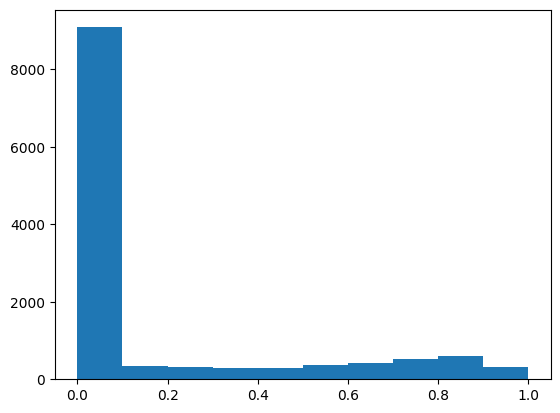

In [ ]:
plt.hist(x.flatten().cpu().numpy())

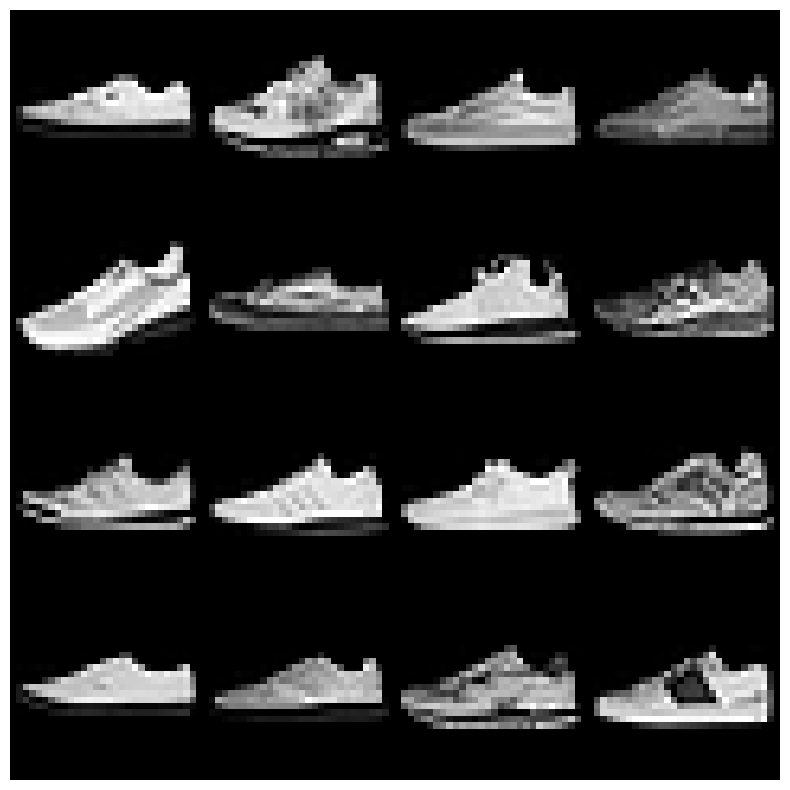

In [ ]:
montage_plot(x[0:25,0,:,:].detach().cpu().numpy())

In [ ]:
X = X.view(-1,784)
X_test = X_test.view(-1,784)

def get_batch(mode):
    b = batch_size
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
def MSE(image_batch_recon, image_batch):
    return torch.mean((image_batch_recon - image_batch)**2)

In [ ]:
def Encoder(x,w):
    return x@w[0]

In [ ]:
def Decoder(x,w):
    return x@(w[0].T)

In [ ]:
def Autoencoder(x,w):
    return Decoder(Encoder(x,w),w)

In [ ]:
batch_size = 512
steps = 100000
learning_rate = 4e-3

In [ ]:
# w0 = GPU(randn_trunc((784,78)))
w0 = GPU(np.random.randn(784,78))

w = [w0]

optimizer = torch.optim.Adam(params=w, lr=learning_rate, weight_decay=1e-5)

for step in range(steps):
        
    x,y = get_batch('train')
    
    # autoencoder reconstruction
    x2 = Autoencoder(x,w)
    
    # reconstruction error
    loss = MSE(x2, x)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

    if step % 1000 == 0:
        print(loss.item())

7693.4169921875
93.96572875976562
27.605623245239258
11.635893821716309
5.11553955078125
2.6311914920806885
1.3118852376937866
0.6438367366790771
0.3856620788574219
0.22634202241897583
0.1713578701019287
0.04911642521619797
0.025455540046095848
0.014924614690244198
0.010271486826241016
0.006878694519400597
0.005493158008903265
0.004309489391744137
0.0036665406078100204
0.003532739356160164
0.003240154590457678
0.003267169464379549
0.0033378477673977613
0.003385423216968775
0.0035896096378564835


KeyboardInterrupt: ignored

In [ ]:
batch_size = 16

In [ ]:
x,y = get_batch('test')

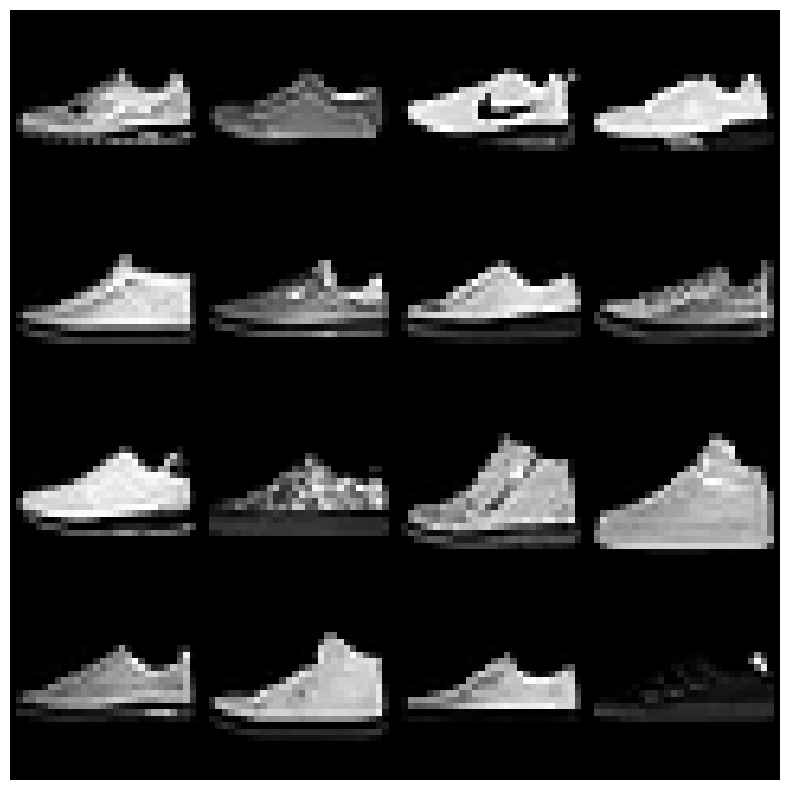

In [ ]:
montage_plot(x.reshape(-1,28,28).detach().cpu().numpy())

In [ ]:
x2 = Autoencoder(x,w)

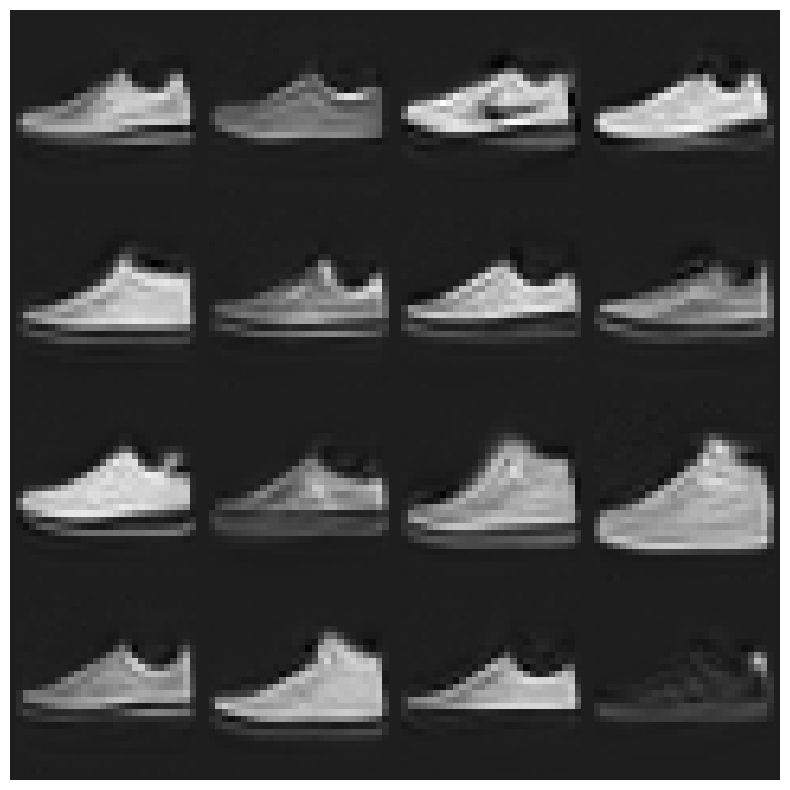

In [ ]:
montage_plot(x2.reshape(-1,28,28).detach().cpu().numpy())

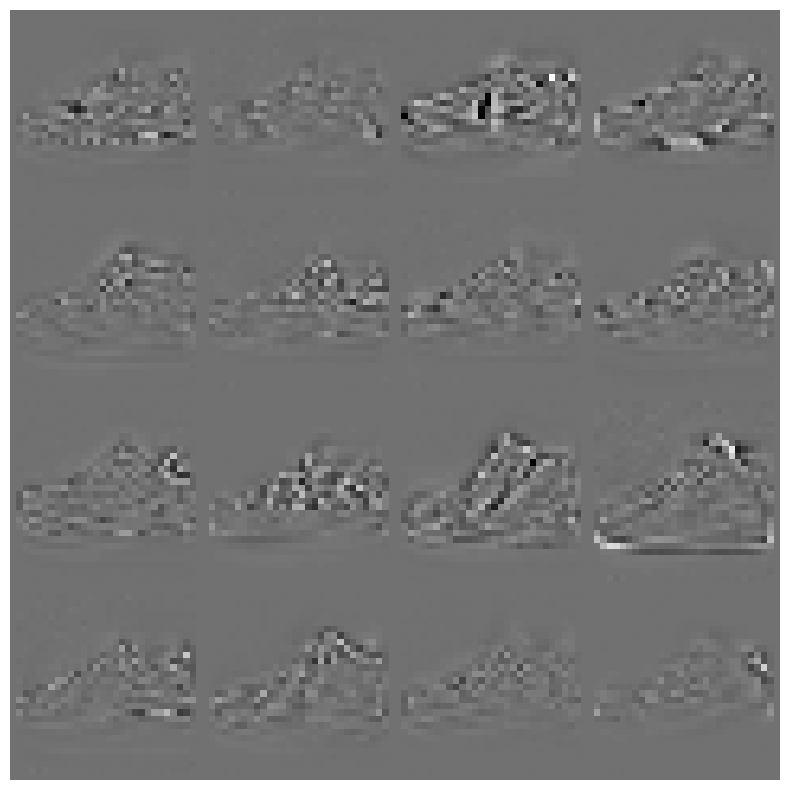

In [ ]:
montage_plot((x-x2).reshape(-1,28,28).detach().cpu().numpy())

# Convolutional Autoencoder

In [ ]:
# #MNIST
# train_set = datasets.MNIST('./data', train=True, download=True)
# test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
# train_set = datasets.KMNIST('./data', train=True, download=True)
# test_set = datasets.KMNIST('./data', train=False, download=True)

#Fashion MNIST
train_set = datasets.FashionMNIST('./data', train=True, download=True)
test_set = datasets.FashionMNIST('./data', train=False, download=True)

100%|██████████| 26421880/26421880 [00:02<00:00, 12376477.95it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 210774.97it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3878572.50it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6545097.60it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()
X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255
# X = (X - 0.5)/0.5
# X_test = (X_test - 0.5)/0.5

In [ ]:
n = 7

index = np.where(Y == n)
X = X[index]
index = np.where(Y_test == n)
X_test = X_test[index]

In [ ]:
X.shape,Y.shape,X_test.shape,Y_test.shape

((6000, 1, 28, 28), (60000,), (1000, 1, 28, 28), (10000,))

In [ ]:
###################################################

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
X = GPU_data(X)
X_test = GPU_data(X_test)

Y = GPU_data(Y)
Y_test = GPU_data(Y_test)

In [ ]:
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-xcpz33di
  Running command git clone --filter=blob:none --quiet https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-xcpz33di
  Resolved https://github.com/williamedwardhahn/mpcr to commit 8d265643f3b8b6e0ed96c7fb98da047fdcd3bb51
  Preparing metadata (setup.py) ... done


In [ ]:
def get_batch(mode):
    b = 512
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
X = X.reshape(X.shape[0],1,28,28)
X_test = X_test.reshape(X_test.shape[0],1,28,28)

In [ ]:
X.shape

torch.Size([6000, 1, 28, 28])

In [ ]:
X = torchvision.transforms.functional.normalize(X,0.5,0.5)
X_test = torchvision.transforms.functional.normalize(X_test,0.5,0.5)

In [ ]:
def Encoder(x,w):
    x = relu(conv2d(x,w[0], stride=(2, 2), padding=(1, 1)))
    x = relu(conv2d(x,w[1], stride=(2, 2), padding=(1, 1)))
    x = x.view(x.size(0), 6272)
    x = linear(x,w[2])
    return x

In [ ]:
def Decoder(x,w):
    x = linear(x,w[3])
    x = x.view(x.size(0), 128, 7, 7)
    x = relu(conv_transpose2d(x,w[4], stride=(2, 2), padding=(1, 1)))
    x = torch.tanh(conv_transpose2d(x,w[5], stride=(2, 2), padding=(1, 1)))
    return x

In [ ]:
def Autoencoder(x,w):
    return Decoder(Encoder(x,w),w)

In [ ]:
num_steps = 1000
batch_size = 512
learning_rate = 1e-3

In [ ]:
#Encode
w0 = GPU(randn_trunc((64,1,4,4)))
w1 = GPU(randn_trunc((128,64,4,4)))
w2 = GPU(randn_trunc((10,6272)))
#Decode
w3 = GPU(randn_trunc((6272,10)))
w4 = GPU(randn_trunc((128,64,4,4)))
w5 = GPU(randn_trunc((64,1,4,4)))

w = [w0,w1,w2,w3,w4,w5]

optimizer = torch.optim.Adam(params=w, lr=learning_rate)

for i in range(num_steps):

    x_real,y = get_batch('train')
    
    x_fake = Autoencoder(x_real,w)
    
    loss = torch.mean((x_fake - x_real)**2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

    if i % 100 == 0: print(loss.item())

1.1891613006591797
0.06710696965456009
0.049508508294820786
0.043206993490457535
0.0422360934317112
0.039223942905664444
0.03789034113287926
0.036657147109508514
0.03773913159966469
0.03467433899641037


In [ ]:
image_batch,y = get_batch('test')

In [ ]:
image_batch_recon = Autoencoder(image_batch,w)

In [ ]:
torch.mean((image_batch_recon - image_batch)**2)

tensor(0.0430, device='cuda:0', grad_fn=<MeanBackward0>)

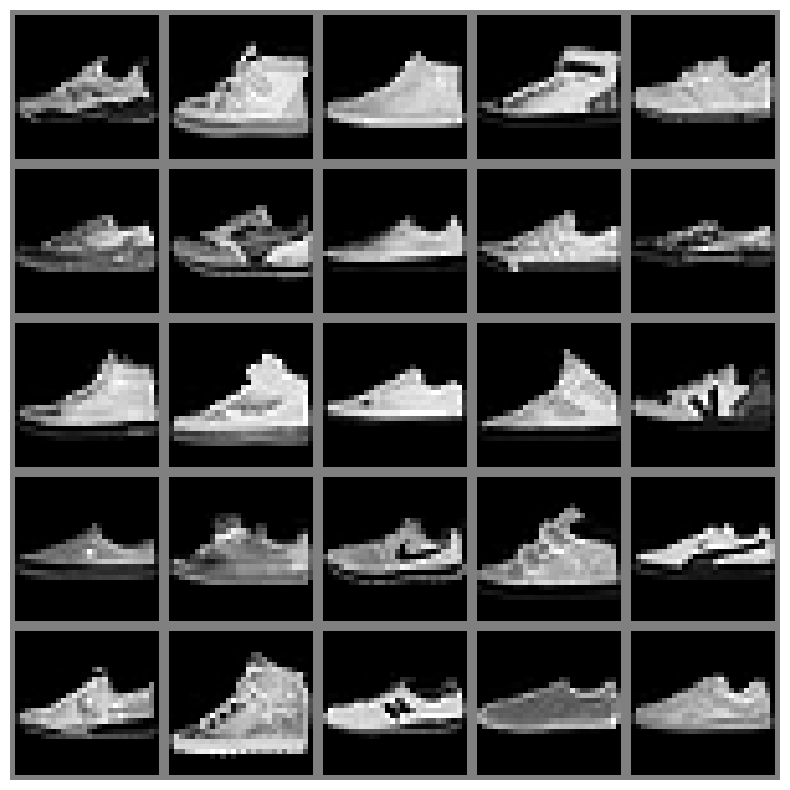

In [ ]:
montage_plot(image_batch[0:25,0,:,:].cpu().detach().numpy())

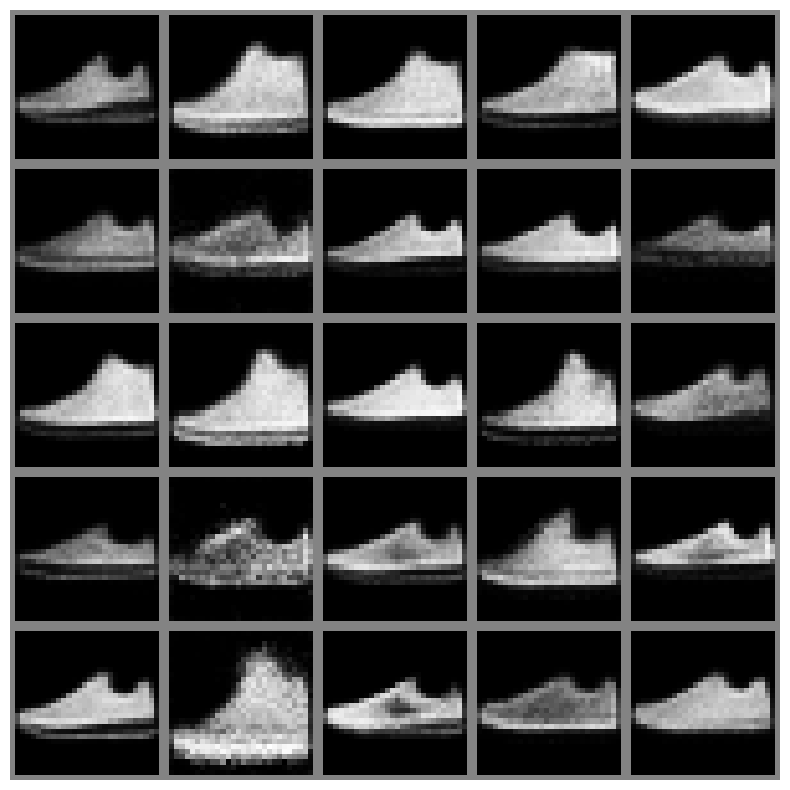

In [ ]:
montage_plot(image_batch_recon[0:25,0,:,:].cpu().detach().numpy())


### Generator



Convolutional Transpose

In [ ]:
latent_size = 64
hidden_size = 256
image_size = 784
b = 512

In [ ]:
#MNIST
# train_set = datasets.MNIST('./data', train=True, download=True)
# test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
#train_set = datasets.KMNIST('./data', train=True, download=True)
#test_set = datasets.KMNIST('./data', train=False, download=True)

#Fashion MNIST
train_set = datasets.FashionMNIST('./data', train=True, download=True)
test_set = datasets.FashionMNIST('./data', train=False, download=True)

In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()
X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255
X = (X - 0.5)/0.5
X_test = (X_test - 0.5)/0.5

In [ ]:
n = 7

index = np.where(Y == n)
X = X[index]
index = np.where(Y_test == n)
X_test = X_test[index]

In [ ]:
X.shape,Y.shape,X_test.shape,Y_test.shape

((6000, 1, 28, 28), (60000,), (1000, 1, 28, 28), (10000,))

In [ ]:
###################################################

In [ ]:
X = GPU_data(X)
X_test = GPU_data(X_test)
Y = GPU_data(Y)
Y_test = GPU_data(Y_test)

In [ ]:
x,y = get_batch('train')

In [ ]:
x.shape

torch.Size([512, 1, 28, 28])

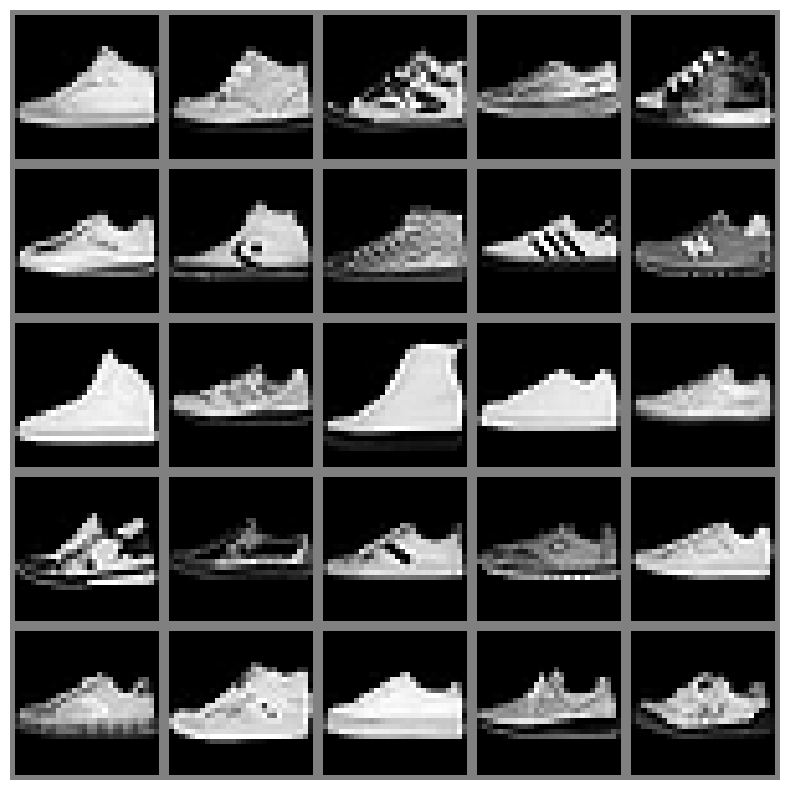

In [ ]:
montage_plot(x[0:25,0,:,:].detach().cpu().numpy())

In [ ]:
#D
w0 = GPU(randn_trunc((64,1,4,4)))
w1 = GPU(randn_trunc((128,64,4,4)))
w2 = GPU(randn_trunc((1,6272)))
#G
w3 = GPU(randn_trunc((6272,64)))
w4 = GPU(randn_trunc((128,64,4,4)))
w5 = GPU(randn_trunc((64,1,4,4)))

w = [w0,w1,w2,w3,w4,w5]

In [ ]:
def D(x,w):
    x = relu(conv2d(x,w[0], stride=(2, 2), padding=(1, 1)))
    x = relu(conv2d(x,w[1], stride=(2, 2), padding=(1, 1)))
    x = x.view(x.size(0), 6272)
    x = linear(x,w[2])
    x = torch.sigmoid(x)
    return x

In [ ]:
def G(x,w):
    x = linear(x,w[3])
    x = x.view(x.size(0), 128, 7, 7)
    x = relu(conv_transpose2d(x,w[4], stride=(2, 2), padding=(1, 1)))
    x = torch.tanh(conv_transpose2d(x,w[5], stride=(2, 2), padding=(1, 1)))
    return x

In [ ]:
b = 512

In [ ]:
batch_size = b

In [ ]:
batch_size

512

In [ ]:
d_optimizer = torch.optim.Adam(w[0:3], lr=0.0002)
g_optimizer = torch.optim.Adam(w[3:], lr=0.0002)

real_labels = Variable(torch.ones(batch_size, 1).cuda())
fake_labels = Variable(torch.zeros(batch_size, 1).cuda())

In [ ]:
num_epochs = 500 
batches = X.shape[0]//batch_size
steps = num_epochs*batches

In [ ]:
z1 = Variable(torch.randn(steps,batch_size,latent_size).cuda())
z2 = Variable(torch.randn(steps,batch_size,latent_size).cuda())

In [ ]:
for i in range(steps):
        
    images,y = get_batch('train')
        
    d_loss = binary_cross_entropy(D(images,w), real_labels) + binary_cross_entropy(D(G(z1[i],w),w), fake_labels)
    d_optimizer.zero_grad()
    d_loss.backward()
    d_optimizer.step()
       
    
    g_loss = binary_cross_entropy(D(G(z2[i],w),w), real_labels)
    g_optimizer.zero_grad()
    g_loss.backward()
    g_optimizer.step()

    
    if i % 200 == 0:
        out = G(z1[np.random.randint(steps)],w)
        montage_plot(out.view(batch_size,1,28,28).detach().cpu().numpy()[0:25,0,:,:])

In [ ]:
z1[np.random.randint(steps)].shape

torch.Size([512, 64])

In [ ]:
noise = GPU_data(torch.randn(1,64))

In [ ]:
output = G(noise,w)

In [ ]:
output.shape

torch.Size([1, 1, 28, 28])

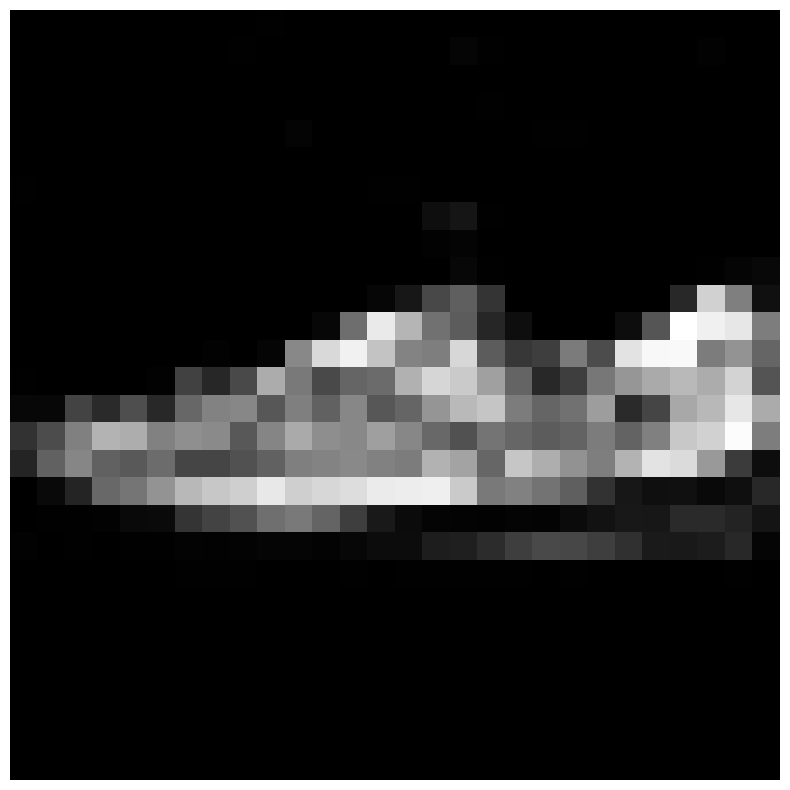

In [ ]:
plot(output[0,0])